# TOC:
* [Data Cleaning](#Data-Cleaning)
* [Dim Reduction](#Dim-Reduction)
* [Cluster](#Cluster)
* [Classification](#Classification)

In [263]:
# Data Manipulation
import pandas as pd
import numpy as np

# Models
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Visualisation
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import FixedLocator, FixedFormatter

# Data Cleaning

In [4]:
df_raw = pd.read_excel('../raw_data .xlsx')

In [5]:
df_raw.head()

cluster_q = [
    'q5_1','q5_2','q5_3','q5_4','q5_5','q5_6','q5_7','q5_8','q5_9','q5_10','q5_11','q5_12','q5_13','q5_14','q5_15','q5_16','q5_17','q5_18','q5_19','q5_20','q5_21','q5_22','q5_23',
    'q6_1','q6_2','q6_3','q6_4','q6_5','q6_6','q6_7','q6_8','q6_9','q6_10','q6_11','q6_12','q6_13','q6_14','q6_15','q6_16',
    'q7_1','q7_2','q7_3','q7_4','q7_5','q7_6','q7_7','q7_8','q7_9','q7_10','q7_11','q7_12','q7_13','q7_14','q7_15','q7_16','q7_17'
]

df_cluster_q = df_raw[cluster_q]

df_cluster_q.head()

,q5_1,q5_2,q5_3,q5_4,q5_5,q5_6,q5_7,q5_8,q5_9,q5_10,...,q7_8,q7_9,q7_10,q7_11,q7_12,q7_13,q7_14,q7_15,q7_16,q7_17
0,2,3,4,4,2,4,2,4,2,3,...,3,4,2,2,3,2,3,3,3,4
1,2,4,4,5,2,4,2,5,4,4,...,4,4,2,4,4,4,4,4,2,4
2,5,4,5,4,3,4,3,4,4,4,...,3,4,4,4,2,3,5,3,4,3
3,3,3,5,5,5,4,4,4,4,5,...,5,4,4,4,5,5,4,3,4,3
4,2,4,4,4,2,4,4,4,3,3,...,4,2,2,4,2,2,1,4,4,4


# Dim Reduction

NMF 

In [6]:
from sklearn import decomposition

nmf = decomposition.NMF(n_components=25)
nmf.fit(df_cluster_q)


df_nmf = pd.DataFrame(nmf.transform(df_cluster_q))
print("transformed shape:", df_nmf.shape)

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


transformed shape: (1427, 25)


/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [7]:
X = df_cluster_q.to_numpy()
X

df_nmf.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.209017,0.302506,0.089918,0.155626,0.121292,0.118147,0.139942,0.174558,0.331932,0.156958,...,0.102053,0.319101,0.054535,0.075484,0.148071,0.082361,0.056635,0.130603,0.168331,0.109854
1,0.246390,0.359083,0.043650,0.266626,0.000000,0.120149,0.219835,0.164689,0.253408,0.114596,...,0.045093,0.340319,0.146936,0.149016,0.291109,0.066732,0.141809,0.209105,0.187679,0.027204
2,0.206139,0.280771,0.287519,0.192676,0.175551,0.044512,0.128133,0.138520,0.230460,0.179041,...,0.198059,0.020109,0.281362,0.226919,0.259899,0.120256,0.183090,0.204827,0.170731,0.091528
3,0.316962,0.118503,0.124869,0.248674,0.229495,0.103929,0.314556,0.159177,0.364303,0.207956,...,0.283077,0.401290,0.211661,0.160290,0.262964,0.201468,0.183301,0.206895,0.196701,0.127764
4,0.311368,0.650649,0.043525,0.358238,0.162680,0.035511,0.001132,0.000000,0.304481,0.223040,...,0.227783,0.102885,0.072441,0.094408,0.136011,0.050865,0.191868,0.062942,0.001943,0.040430


PCA

In [8]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),]) #numeric pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, cluster_q),]) #full pipeline 
X = full_pipeline.fit_transform(df_cluster_q) #apply the pipeline on the x_train set 
X #print out
X.shape

(1427, 56)

In [9]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(X)


df_pca = pd.DataFrame(pca.transform(X))
print("transformed shape:", df_pca.shape)

transformed shape: (1427, 56)


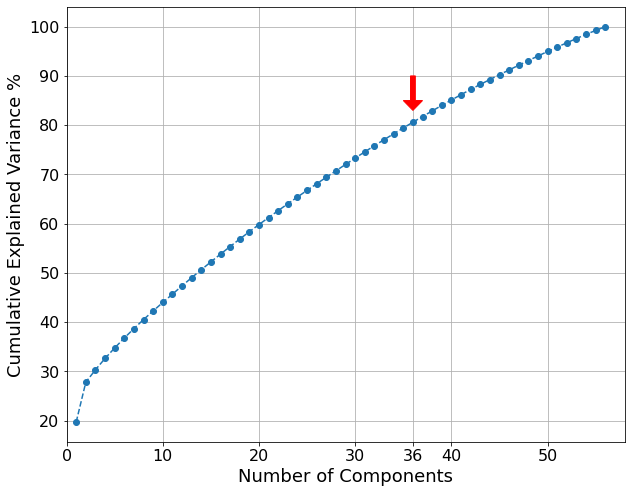

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(range(1, 57), pca.explained_variance_ratio_.cumsum()*100, marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance %',fontsize=18)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.arrow(36, 90, 0, -7, length_includes_head=True, width=0.5,
          head_width=2, head_length=2, color='r',zorder=2)

# Get current tick locations and append 271 to this array
x_ticks = np.append(ax.get_xticks(), 36)

# Set xtick locations to the values of the array `x_ticks`
ax.set_xticks(x_ticks)

ax.set_xlim(0,58)

plt.show();

In [174]:
model = PCA(n_components=0.8).fit(X)
X_pc = model.transform(X)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

most_important_value = [np.abs(model.components_[i]).max() for i in range(n_pcs)]

# get the names
most_important_names = [cluster_q[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {i+1: most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_q = pd.DataFrame(sorted(dic.items()))
df_q = pd.concat([df_q,pd.DataFrame(most_important_value)],axis=1)
df_q.columns = ['PC','Question','Explained Variance']

In [180]:
len(df_q['Question'].unique())

27

In [183]:
df_q.drop_duplicates(['Question'])

,PC,Question,Explained Variance
0,1,q7_12,0.196619
1,2,q7_5,0.301888
2,3,q5_23,0.445227
3,4,q6_6,0.356026
5,6,q6_4,0.469873
6,7,q7_13,0.401609
7,8,q5_1,0.496622
8,9,q6_10,0.384317
9,10,q6_3,0.465409
13,14,q5_7,0.485376


In [356]:
np.sort(df_q['Question'].unique())

array(['q5_1', 'q5_11', 'q5_20', 'q5_22', 'q5_23', 'q5_3', 'q5_5', 'q5_6',
       'q5_7', 'q6_10', 'q6_11', 'q6_12', 'q6_13', 'q6_14', 'q6_15',
       'q6_2', 'q6_3', 'q6_4', 'q6_6', 'q6_7', 'q7_1', 'q7_10', 'q7_12',
       'q7_13', 'q7_3', 'q7_5', 'q7_6'], dtype=object)

In [357]:
### Correlation

df_pc_cluster = df_raw[df_q['Question'].unique().tolist()]
df_pc_cluster.head()

,q7_12,q7_5,q5_23,q6_6,q6_4,q7_13,q5_1,q6_10,q6_3,q5_7,...,q5_5,q6_12,q6_14,q6_7,q6_15,q5_22,q5_11,q5_3,q6_2,q5_6
0,3,2,4,2,3,2,2,4,3,2,...,2,3,3,3,3,3,3,4,4,4
1,4,2,3,2,4,4,2,3,2,2,...,2,2,4,2,4,4,4,4,2,4
2,2,5,5,4,2,3,5,3,3,3,...,3,4,3,4,3,5,5,5,4,4
3,5,3,5,4,3,5,3,3,5,4,...,5,4,5,5,4,4,4,5,4,4
4,2,2,2,4,2,2,2,4,4,4,...,2,3,4,2,5,4,4,4,2,4


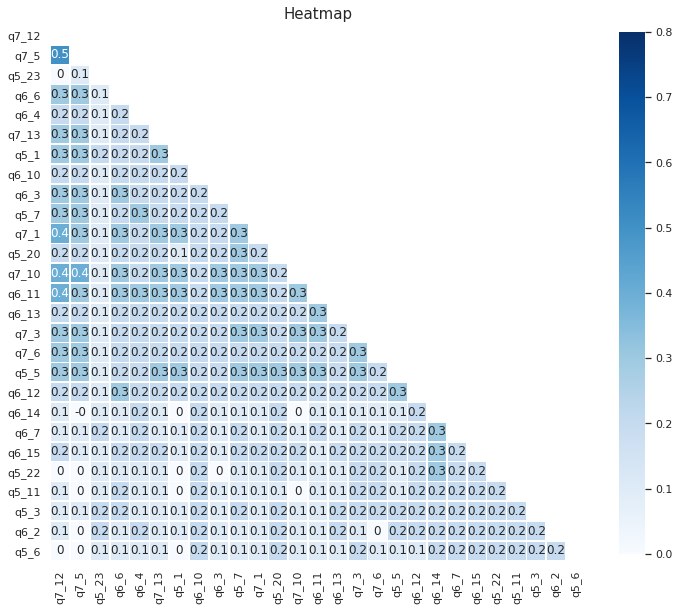

In [186]:
#create a correlation heatmap 
sns.set(style='white') #set the style
corr = round(df_pc_cluster.corr(),1) #define the correlation 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,12)) #figure size 
cmap = sns.diverging_palette(10,150, as_cmap=True) #figure colour 
ax = sns.heatmap(corr, mask =mask, cmap="Blues", vmax= 0.8, annot = True, 
annot_kws= {'size':12}, square=True, xticklabels=True, yticklabels=True, 
linewidths=.6, linecolor='w', cbar_kws={'shrink': 0.8}, ax=ax) #input the ax varibales 
ax.set_title('Heatmap', fontsize=15); #set the title 

corr = round(df_pc_cluster.corr(),1)
# corr

# Cluster

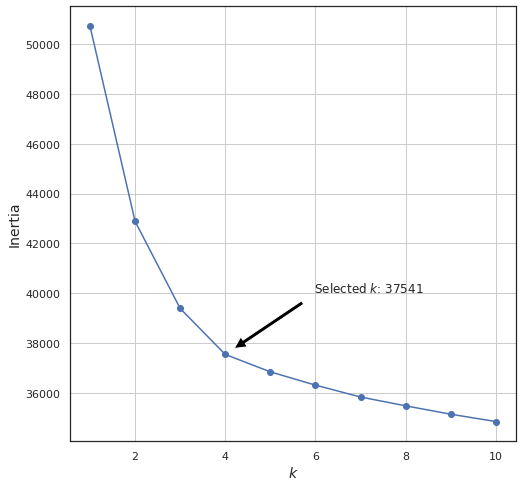

In [349]:
X = df_pc_cluster.to_numpy()
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Selected $k$: {}'.format(round(inertias[3])),
             xy=(4, inertias[3]),
             xytext=(0.6, 0.4),
             textcoords='figure fraction',
             fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.grid(zorder=-1)
plt.show()

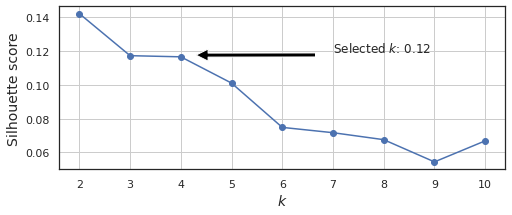

In [350]:
X = df_pc_cluster.to_numpy()
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.annotate('Selected $k$: {}'.format(round(silhouette_scores[2],2)),
             xy=(4, silhouette_scores[2]+0.001),
             xytext=(0.65, 0.755),
             textcoords='figure fraction',
             fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.grid(zorder=-1)
plt.show()

In [351]:
silhouette_scores

[0.14229393075963087,
 0.11735411255669023,
 0.11667307920206678,
 0.10108587994884863,
 0.07481254372761141,
 0.07165840072131692,
 0.06752388480370045,
 0.054342823586525146,
 0.06682859664391273]

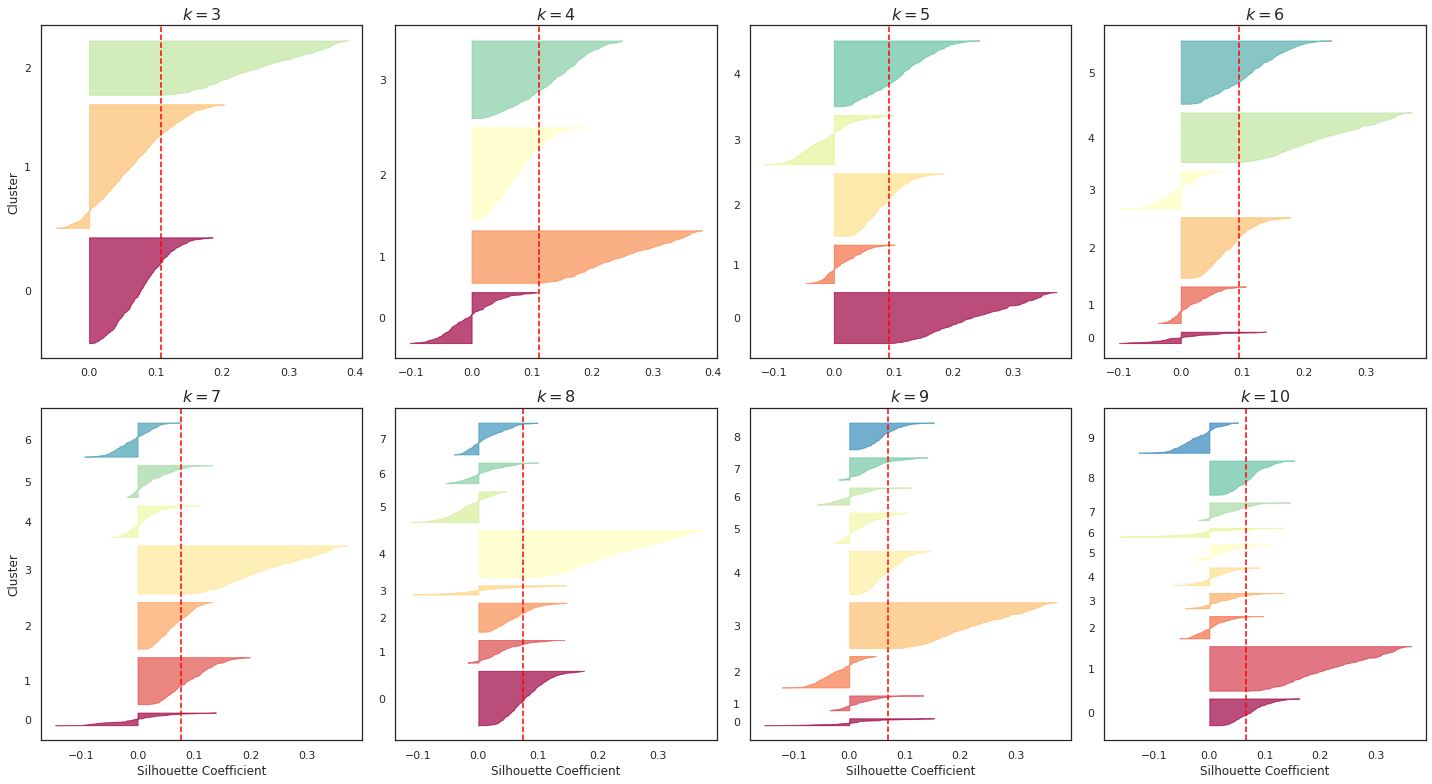

In [262]:
X = df_pc_cluster.to_numpy()

plt.figure(figsize=(20, 11))

for k in range(3,11):
    plt.subplot(2, 4, k-2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 7):
        plt.ylabel("Cluster")
    
    if k in (7, 8, 9, 10):
        plt.xlabel("Silhouette Coefficient")
#     else:
#         plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.tight_layout()
plt.show()

## Comparison

In [192]:
old_labels = pd.read_csv('../labelled_data.csv',index_col=0)['label']

In [193]:
df_cluster_q['old_labels'] = old_labels

<ipython-input-193-4a291d481759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_q['old_labels'] = old_labels


In [333]:
X = df_pc_cluster.to_numpy()
km = KMeans(n_clusters=4,random_state=42)
km.fit(X)
labels = km.labels_
df_pc_cluster['label'] = labels + 1

<ipython-input-333-fe91d1031fd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pc_cluster['label'] = labels + 1


In [334]:
df_pc_cluster['label'].value_counts(normalize=False).sort_index()

1    273
2    402
3    265
4    487
Name: label, dtype: int64

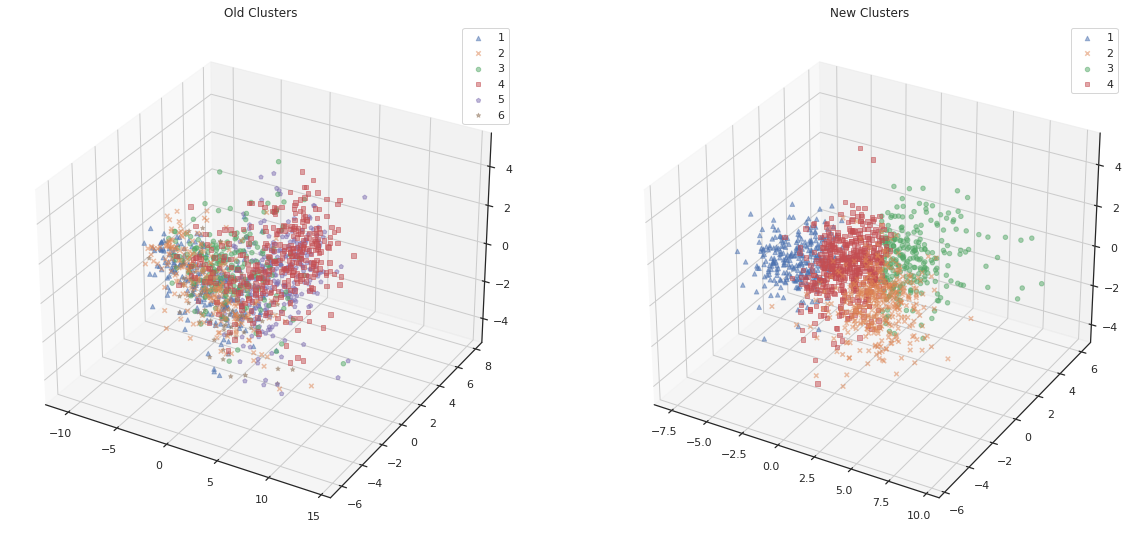

In [335]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(20,20))

pca = PCA(n_components=3)

X = df_pc_cluster.drop('label',axis=1)
X = pca.fit_transform(X)

X_old = df_cluster_q.drop('old_labels',axis=1)
X_old = pca.fit_transform(X_old)

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot the old clusters in 3d
m = ['^','x','o','s','p','*']
for group, ins in pd.concat([pd.DataFrame(X_old),df_cluster_q['old_labels']],axis=1).groupby('old_labels'):
    old_sc = ax.scatter3D(ins[0], ins[1], ins[2],cmap='Set1',alpha=0.5,marker=m[group-1],label=group)
    ax.legend()
    ax.set_title('Old Clusters')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot the new clusters in 3d
m = ['^','x','o','s']
for group, ins in pd.concat([pd.DataFrame(X),df_pc_cluster['label']],axis=1).groupby('label'):
    new_sc = ax.scatter3D(ins[0], ins[1], ins[2],cmap='Set1',alpha=0.5,marker=m[group-1],label=group)
    ax.legend()
    ax.set_title('New Clusters')

plt.show()

In [336]:
X = df_cluster_q.drop('old_labels',axis=1)
labels = df_cluster_q['old_labels']
old_cluster = silhouette_score(X, labels, metric='euclidean').round(5)

In [337]:
X = df_pc_cluster.drop('label',axis=1)
labels = df_pc_cluster['label']
new_cluster = silhouette_score(X, labels, metric='euclidean').round(5)

In [338]:
print('new_cluster:',new_cluster)
print('old_cluster:',old_cluster)

new_cluster: 0.07428
old_cluster: -0.00341


# Classification

BTB decided to use the old clusters for further anlysis. Hence, the following analysis is conducted based on the old clusters.

In [103]:
df_cluster_q.head()

,q5_1,q5_2,q5_3,q5_4,q5_5,q5_6,q5_7,q5_8,q5_9,q5_10,...,q7_9,q7_10,q7_11,q7_12,q7_13,q7_14,q7_15,q7_16,q7_17,old_labels
0,2,3,4,4,2,4,2,4,2,3,...,4,2,2,3,2,3,3,3,4,5
1,2,4,4,5,2,4,2,5,4,4,...,4,2,4,4,4,4,4,2,4,1
2,5,4,5,4,3,4,3,4,4,4,...,4,4,4,2,3,5,3,4,3,3
3,3,3,5,5,5,4,4,4,4,5,...,4,4,4,5,5,4,3,4,3,1
4,2,4,4,4,2,4,4,4,3,3,...,2,2,4,2,2,1,4,4,4,4


In [114]:
df_cluster_q['old_labels'].value_counts(normalize=True).sort_index()

1    0.155571
2    0.188507
3    0.147863
4    0.234057
5    0.203924
6    0.070077
Name: old_labels, dtype: float64

## Data Preparation

In [109]:
X = df_cluster_q.drop('old_labels',axis=1)
y = df_cluster_q['old_labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
df_cluster_q['old_labels'].value_counts(normalize=True).sort_index()

1    0.155571
2    0.188507
3    0.147863
4    0.234057
5    0.203924
6    0.070077
Name: old_labels, dtype: float64

## Logistic regression

In [280]:
logit = LogisticRegression(random_state=42, class_weight='balanced',multi_class='multinomial')
logit.fit(X_train,y_train)

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   random_state=42)

In [281]:
ypred = logit.predict(X_test)

print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           1       0.84      0.78      0.81        54
           2       0.86      0.81      0.84        54
           3       0.78      0.98      0.87        44
           4       0.91      0.94      0.92        63
           5       0.82      0.90      0.86        40
           6       0.90      0.61      0.73        31

    accuracy                           0.85       286
   macro avg       0.85      0.84      0.84       286
weighted avg       0.85      0.85      0.85       286



### Randomised Search

In [298]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = np.arange(0.1,15.1,0.2).tolist()
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [317]:
model = LogisticRegression(random_state=42, class_weight='balanced')
random_search_logit = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter = 100, cv = 5,
                                         verbose=2, random_state=42, n_jobs = -1, scoring='f1_weighted')
random_result_logit = random_search_logit.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.82866972        nan 0.89236938        nan        nan        nan
        nan 0.89118466 0.83240024 0.89106463 0.82847915 0.82944933
 0.84116059 0.83105639 0.83044783 0.83469311 0.89118266        nan
 0.83630509 0.88951208        nan        nan 0.89280928 0.8767358
 0.82434937 0.82800949        nan 0.82973792 0.82847915        nan
        nan 0.8309706  0.8271923  0.83105639 0.89233218        nan
 0.82954209 0.82778703 0.81770661        nan 0.89118466 0.8913086
        nan 0.89044063 0.89362615        nan        nan 0.83091238
 0.82710865        nan 0.88865617        nan 0.82975812 0.83731665
 0.82630744 0.81277505 0.83072254 0.88373759 0.8225614         nan
        nan        nan 0.83084614 0.82559892 0.83469809 0.83132554
 0.82646717 0.82630744 0.89186922        nan 0.89273767        nan
 0.8272841  0.8308171  0.82710865        na

In [318]:
# summarize results
ypred_logit = random_result_logit.predict(X_test)
print("Best f1 score: %f using %s" % (round(random_result_logit.best_score_,2),random_result_logit.best_params_))
print('')
print('Test:')
print('Test f1 score {}'.format(f1_score(ypred_logit,y_test,average='weighted')))
print('Test accuracy {}'.format(accuracy_score(ypred_logit,y_test)))

Best f1 score: 0.890000 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 13.300000000000002}

Test:
Test f1 score 0.9087091490010791
Test accuracy 0.9090909090909091


### Grid Search

In [319]:
np.arange(12.9,13.5,0.01)

array([12.9 , 12.91, 12.92, 12.93, 12.94, 12.95, 12.96, 12.97, 12.98,
       12.99, 13.  , 13.01, 13.02, 13.03, 13.04, 13.05, 13.06, 13.07,
       13.08, 13.09, 13.1 , 13.11, 13.12, 13.13, 13.14, 13.15, 13.16,
       13.17, 13.18, 13.19, 13.2 , 13.21, 13.22, 13.23, 13.24, 13.25,
       13.26, 13.27, 13.28, 13.29, 13.3 , 13.31, 13.32, 13.33, 13.34,
       13.35, 13.36, 13.37, 13.38, 13.39, 13.4 , 13.41, 13.42, 13.43,
       13.44, 13.45, 13.46, 13.47, 13.48, 13.49])

In [320]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'solver': ['newton-cg'],
    'penalty': ['l2'],
    'C': np.arange(12.9,13.5,0.01),
}
# Create a based model
logit = LogisticRegression(random_state=42, class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logit, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2, scoring='f1_weighted')
grid_search_logit = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [321]:
ypred_logit = grid_search_logit.predict(X_test)
print("Best f1 score: %f using %s" % (round(grid_search_logit.best_score_,2),grid_search_logit.best_params_))
print('Test:')
print('Test f1 score {}'.format(f1_score(ypred_logit,y_test,average='weighted')))
print('Test accuracy {}'.format(accuracy_score(ypred_logit,y_test)))

Best f1 score: 0.890000 using {'C': 13.339999999999991, 'penalty': 'l2', 'solver': 'newton-cg'}
Test:
Test f1 score 0.9087091490010791
Test accuracy 0.9090909090909091


## Random Forest

In [118]:
clf = RandomForestClassifier(class_weight='balanced',random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [119]:
ypred = clf.predict(X_test)

print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           1       0.72      0.72      0.72        50
           2       0.82      0.53      0.65        79
           3       0.49      0.84      0.62        32
           4       0.77      0.74      0.75        68
           5       0.77      0.64      0.70        53
           6       0.19      1.00      0.32         4

    accuracy                           0.67       286
   macro avg       0.63      0.75      0.63       286
weighted avg       0.74      0.67      0.69       286



In [123]:
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced', random_state=42)>

## Fine tuning

### 1. Randomised Search

In [149]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [150]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='f1_weighted')
# Fit the random search model
random_search_rf = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [151]:
print("Best f1 score: %f using %s" % (round(random_search_rf.best_score_,2),random_search_rf.best_params_))
print('')
print('Test:')
print('Test f1 score {}'.format(f1_score(random_search_rf.predict(X_test),y_test,average='weighted')))
print('Test accuracy {}'.format(accuracy_score(random_search_rf.predict(X_test),y_test)))

Best f1 score: 0.680000 using {'n_estimators': 1300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}

Test:
Test f1 score 0.7263501793472047
Test accuracy 0.7202797202797203


### 2. Grid Search

In [152]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [45,50,55],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [9,10,11],
    'n_estimators': [1250,1300,1350]
}
# Create a based model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, scoring='f1_weighted')
grid_search_rf = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [153]:
print("Best f1 score: %f using %s" % (round(grid_search_rf.best_score_,2),grid_search_rf.best_params_))
print('')
print('Test:')
print('Test f1 score {}'.format(f1_score(grid_search_rf.predict(X_test),y_test,average='weighted')))
print('Test accuracy {}'.format(accuracy_score(grid_search_rf.predict(X_test),y_test)))

Best f1 score: 0.680000 using {'bootstrap': True, 'max_depth': 45, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 1300}

Test:
Test f1 score 0.7353383547705915
Test accuracy 0.7307692307692307
